# Basics of Markov Chain Simulation

The following are based on Chapter 12 of Gelman, et. al. (2004), *Basics of Markov Chain Simulation*.

In [1]:
library(mvtnorm)

## Gibbs Sampling

Recreating the bivariate normal example from the book. Suppose we wish to draw samples from the bivariate normal distribution

$$
\begin{pmatrix}
    \theta_1 \\
    \theta_2
\end{pmatrix} \bigg|y \sim \mathcal{N}\bigg( \begin{pmatrix} y_1 \\ y_2 \end{pmatrix}, \begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix} \bigg)
$$

We use the well-known property of the bivariate normal distribution that the corresponding conditionals are

$$
\theta_1 | \theta_2, y \sim \mathcal{N}(y_1 + \rho (\theta_2 - y_2), 1 - \rho^2) \\
\theta_2 | \theta_1, y \sim \mathcal{N}(y_2 + \rho (\theta_1 - y_1), 1 - \rho^2)
$$

In [5]:
mat <- matrix(c(1, 0.8, 0.8, 1), nrow=2, ncol=2)
true.dist <- rmvnorm(10000, mean = c(69, 420), sigma=mat)

niter <- 10000
theta1 <- numeric(niter)
theta2 <- numeric(niter)

theta1[1] <- -69
theta2[1] <- -420

set.seed(923)
for(j in 2:niter){
  theta1[j] <- rnorm(1, mean = 69 + 0.8 * (theta2[j-1] - 420), sqrt(1 - 0.8^2))
  theta2[j] <- rnorm(1, mean = 420 + 0.8 * (theta1[j] - 69), sqrt(1 - 0.8^2))
}

The trace of the sample updates are given by the following

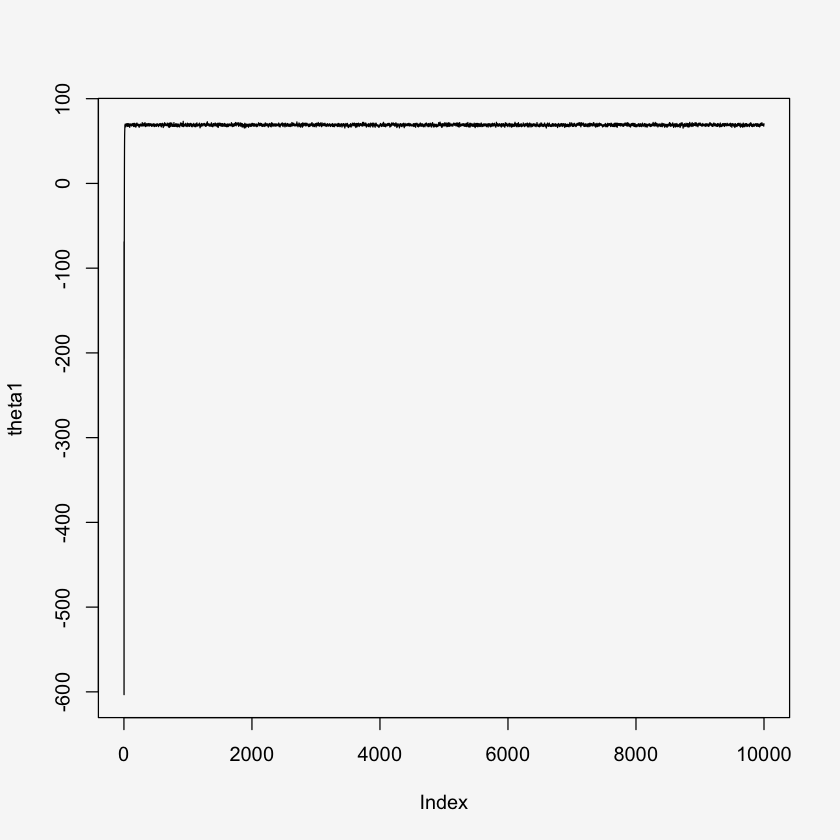

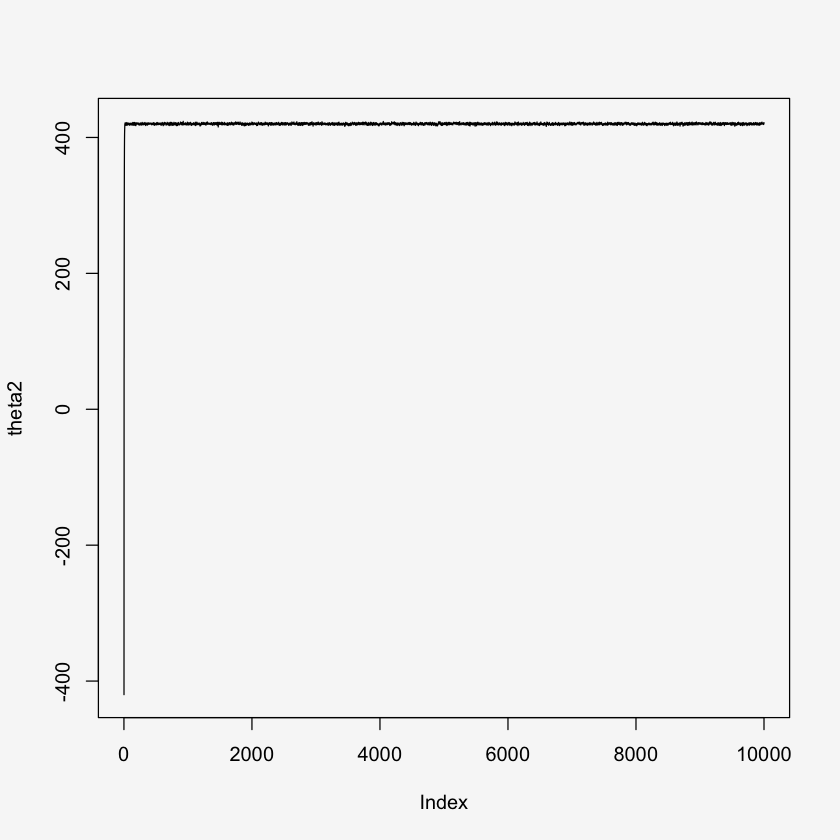

In [6]:
par(bg = "#f7f7f7")
plot(theta1, type = "l")

par(bg = "#f7f7f7")
plot(theta2, type = "l")

Meanwhile, the resulting samples with real samples from the true distribution given in grey

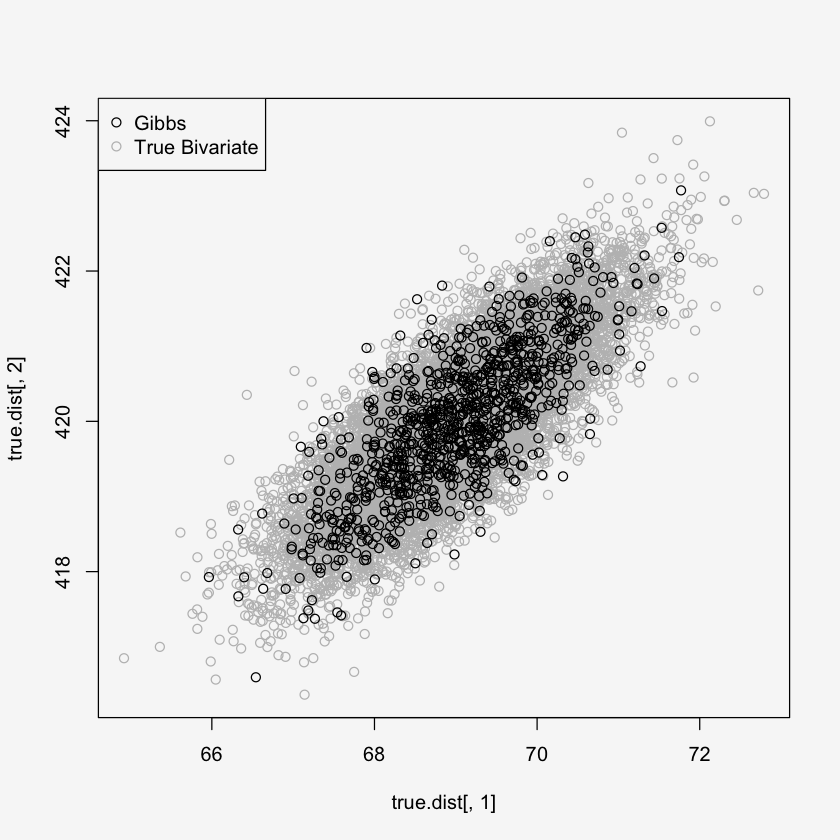

In [10]:
par(bg = "#f7f7f7")
plot(true.dist[,1],true.dist[,2], col="grey")
points(theta1[9000:10000], theta2[9000:10000])
legend("topleft", legend = c("Gibbs", "True Bivariate"), col = c("black","grey"), pch=1)

## Metropolis Algorithm

We recreate the example from the book with a normal jumping kernel.

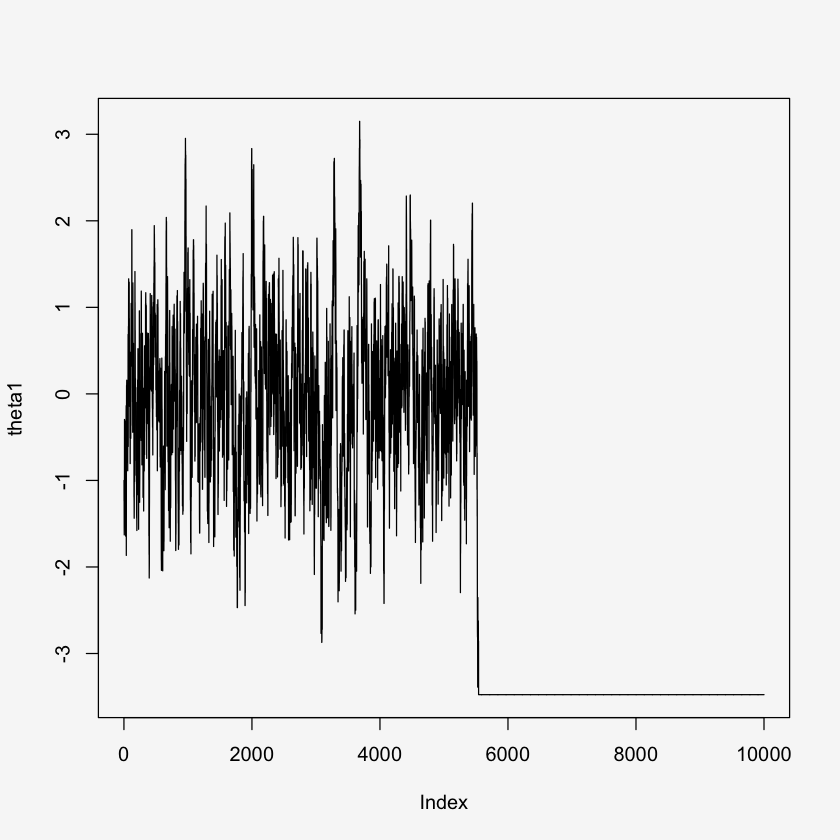

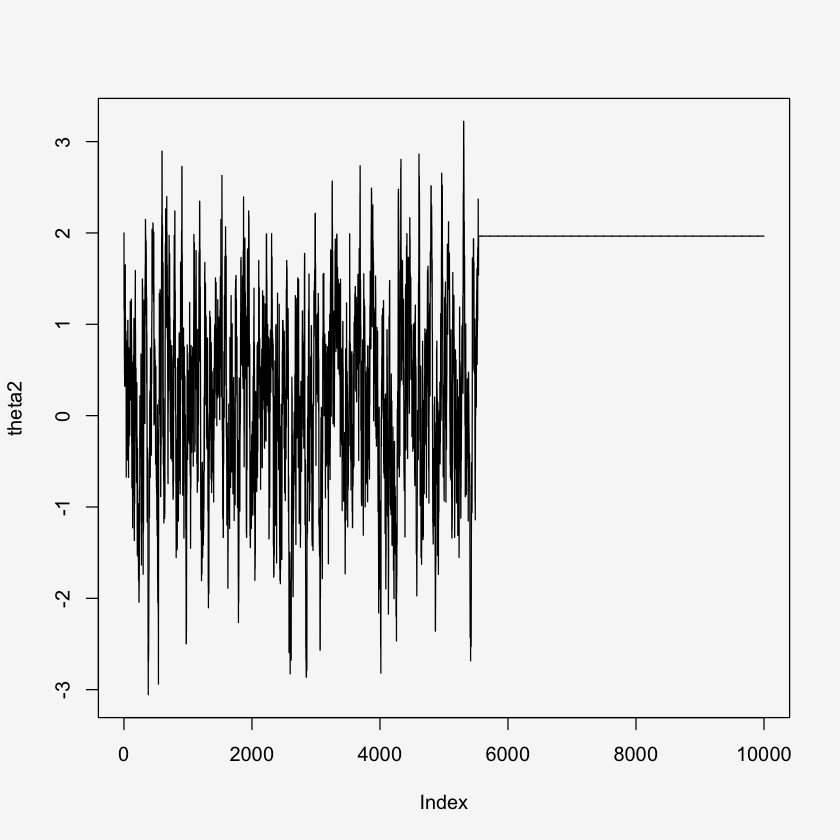

In [11]:
mat <- diag(c(1,1))
true.dist <- rmvnorm(5000, mean = c(0, 0), sigma=mat)

niter <- 10000
theta1 <- numeric(niter)
theta2 <- numeric(niter)

theta1[1] <- -1
theta2[1] <- 2

set.seed(923)
for(j in 2:niter){
  # draw from Jt
  theta_ <- rmvnorm(1, mean=c(theta1[j-1],theta2[j-1]), sigma = diag(c(0.2, 0.2)))
  denom <- dmvnorm(c(theta1[j-1], theta2[j-1]), mean = c(0, 0), sigma = mat)
  denom <- denom * (denom >= 0.0001) + 1 * (denom < 0.0001)
  r = dmvnorm(theta_, mean = c(0, 0), sigma = mat)/denom
  decision = rbinom(1,1,prob=min(r,1))
  
  if(decision == 1){
    theta1[j] <- theta_[1]
    theta2[j] <- theta_[2]
  }else{
    theta1[j] <- theta1[j-1]
    theta2[j] <- theta2[j-1]
  }
}

par(bg = "#f7f7f7")
plot(theta1, type = "l")

par(bg = "#f7f7f7")
plot(theta2, type = "l")

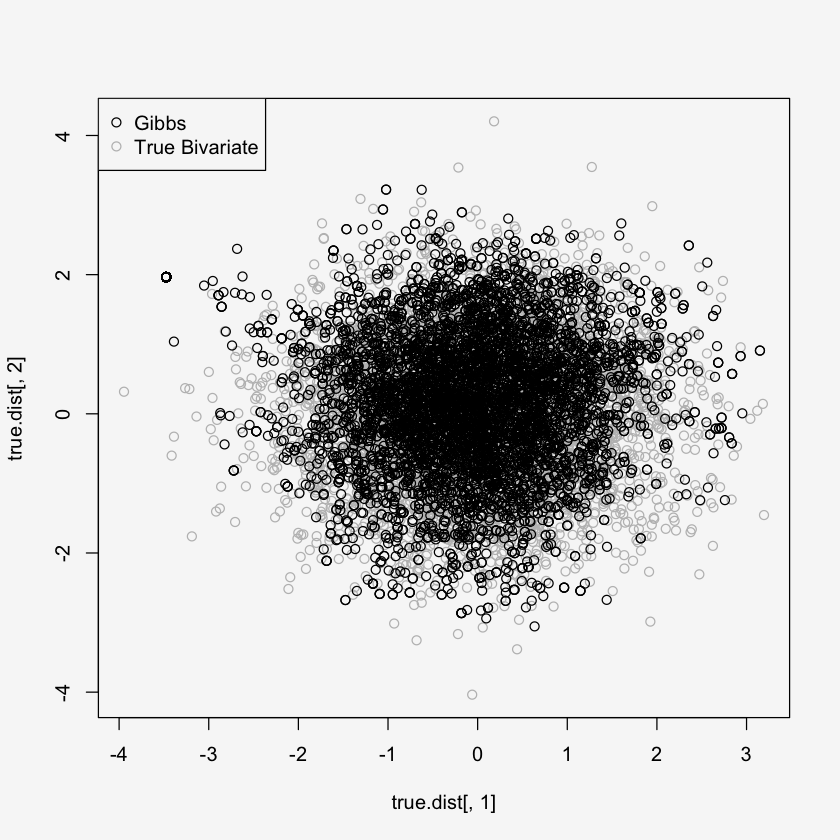

In [12]:
par(bg = "#f7f7f7")
plot(true.dist[,1],true.dist[,2], col="grey")
points(theta1, theta2)
legend("topleft", legend = c("Gibbs", "True Bivariate"), col = c("black","grey"), pch=1)

# References

A. Gelman, J. Carlin, H. Stern, and D. Rubin. Chapman and Hall/CRC, 2nd ed. edition, (2004)